# Analysing Financial Data 


In this post I will be explaining the process of analysing time series data and what better way to do that than to use stock data. 


I will be using the following packages so make sure you have them installed before getting started: 

> <ul>
    <em>
        <li>pandas</li>
        <li>matplotlib</li>
        <li>nsepy</li>
        <li>datetime</li>
        <li>beautiful soup</li>
        <li>pickle</li>
        <li>requests</li>
    </em>
</ul>


I'm going to presume that you know the basics of Python, Pandas and Matplotlib and proceed further. 

If you aren't clear on any of them check out the following links given below :

[Pandas](https://rohitmidha23.github.io/Introduction-to-Pandas/)

[Python](https://www.coursera.org/specializations/python)

# **[Matplotlib TO ADD](https://rohitmidha23.github.io/Introduction-to-Matplotlib/)**

`nsepy` is a package by the NSE, the stock market in India. It provides a way to get the data between a start and end date. You could also use the Yahoo! api, or a pre-existing CSV file. For the time being let us work with the NSE data. 


In [52]:
# the usual import stuff 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [132]:
from nsepy import get_history
from datetime import date
df = get_history(symbol="SBIN", start=date(2015,1,1), end=date(2015,12,12))
# Let's get an idea of the data
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743


Say if you have a pre-existing CSV file do : 
```python 
df = pd.read_csv("data.csv",parse_dates=True,index_col=0)
```
This basically reads the data from the data.csv file and parses the date as the index, something that `nsepy` takes care of, on it's own. 


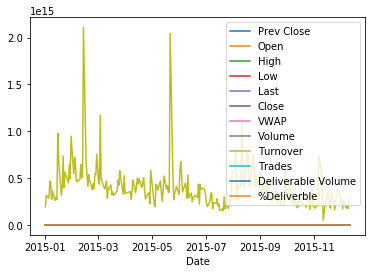

In [133]:
df.plot()

As you can see here the turnover is the only line visible. 

This is because the Turnover values are much much larger than the other values, say Open, Hig, etc. 

<em>For example</em>, from the above table you can see that `Turnover` for `2015-01-01` is `1.925489e+14	` whereas the `Open` is `312.45	`.

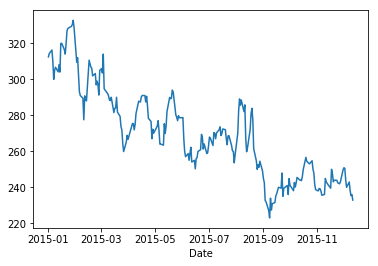

In [134]:
df['Open'].plot()

Now we have specifically asked for the Open column to be plotted so we can get a good idea of it and see how the index has scaled here. 

You can also make new columns, let's say `50_moving_average`.

In layman terms, moving average takes the price from the previous 50 days and averages it out. You can read more about it [here](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp).


In [135]:
df['50_moving_average'] = df['Close'].rolling(window=50).mean()
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,50_moving_average
Date,,,,,,,,,,,,,,,
2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059,NaN
2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249,NaN
2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208,NaN
2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844,NaN
2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743,NaN


So the reason we have `NaN` values present is cause the the first 50 days obviously don't have any previous data to average with and hence they show `NaN`. 

To check if the column, we'll check the last few values for now : 

In [136]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,50_moving_average
Date,,,,,,,,,,,,,,,
2015-12-07,SBIN,EQ,241.10,242.95,242.95,238.0,238.9,238.65,239.77,7531729,1.805861e+14,65807,2924376,0.3883,243.431
2015-12-08,SBIN,EQ,238.65,238.10,239.95,235.3,235.4,235.95,237.46,8254434,1.960117e+14,65633,3060162,0.3707,243.391
2015-12-09,SBIN,EQ,235.95,235.40,238.20,233.6,235.0,234.40,235.80,7408777,1.746990e+14,60770,2281810,0.3080,243.282
2015-12-10,SBIN,EQ,234.40,236.00,236.75,230.6,232.0,231.95,232.64,11713559,2.725085e+14,110656,4727421,0.4036,243.140
2015-12-11,SBIN,EQ,231.95,232.90,233.90,225.1,227.2,227.30,228.87,12872949,2.946294e+14,107212,3731130,0.2898,242.897


One way to deal with the NaN values would be to just outright drop them, but then you'd lose a 100 rows, nah, let's not waste valuable data. 

We'll use a parameter called `min_periods` while creating the new column. This parameter gives the average of the how many ever previous values it can find, if not 50. 

In [137]:
df['50_moving_average'] = df['Close'].rolling(window=50, min_periods=0).mean()
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,50_moving_average
Date,,,,,,,,,,,,,,,
2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059,314.000
2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249,314.625
2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208,314.000
2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844,310.475
2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743,308.410


So now you can clearly see that the second row's value in `50_moving_average` is the average of First Row and Second Row's `Close`.

# <em> Plotting the data </em>

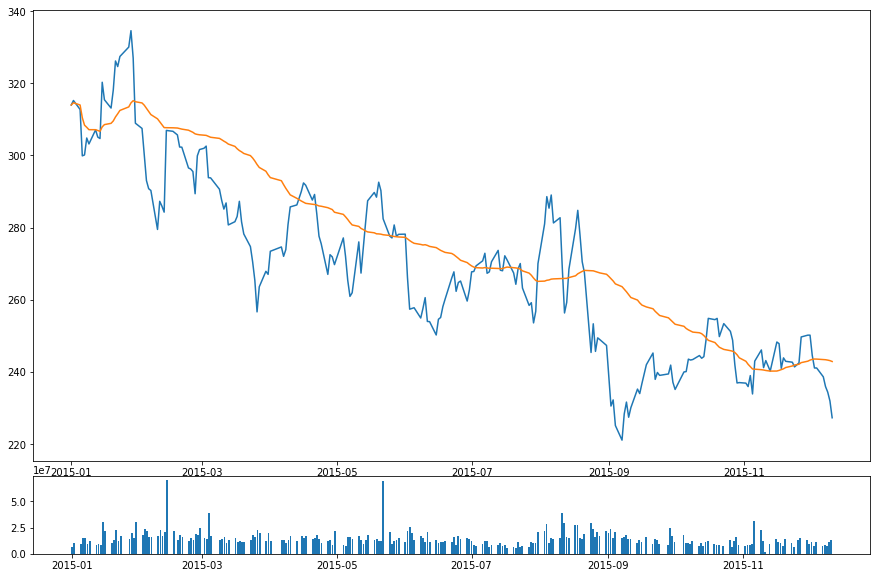

In [138]:
# To change the size of the plot 
fig,ax = plt.subplots(figsize=(15,10))


ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)

ax1.plot(df.index,df['Close'])
ax1.plot(df.index,df['50_moving_average'])
ax2.bar(df.index,df['Volume'])

plt.show()

# <em>Resample the data</em>

In [139]:
# Convert the index to a datetime object. 
df.index = pd.to_datetime(df.index)

# resample the data to ohlc - Open High Low Close 
# 10D refers to the 10 Days over which it resamples
# You can also use stuff like 10Y, etc... 
df_ohlc = df['Close'].resample('10D').ohlc()

# Let's do this for volume too
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2015-01-01 to 2015-12-07
Data columns (total 4 columns):
open     35 non-null float64
high     35 non-null float64
low      35 non-null float64
close    35 non-null float64
dtypes: float64(4)
memory usage: 1.4 KB


<em>Notice</em> that we now have only 35 rows, thus effectively reducing the dataframe from 365 rows to 35 rows!

In [140]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

We want to now move this information to matplotlib, as well as convert the dates to the mdates version. 

Since we're just going to graph the columns in Matplotlib, we actually don't want the date to be an index anymore, so we can do:

In [141]:
df_ohlc = df_ohlc.reset_index()
df_ohlc.head()

,Date,open,high,low,close
0,2015-01-01,314.0,315.25,299.90,303.20
1,2015-01-11,307.1,320.30,304.70,318.15
2,2015-01-21,326.2,334.60,308.95,308.95
3,2015-01-31,307.5,307.50,279.50,279.50
4,2015-02-10,287.3,306.95,284.30,302.35


In [142]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc.head()

,Date,open,high,low,close
0,735599.0,314.0,315.25,299.90,303.20
1,735609.0,307.1,320.30,304.70,318.15
2,735619.0,326.2,334.60,308.95,308.95
3,735629.0,307.5,307.50,279.50,279.50
4,735639.0,287.3,306.95,284.30,302.35


Basically matplotlib uses a very weird format of dates of the sort of `700000` and hence we need to take care of this before finally plotting the figure. 

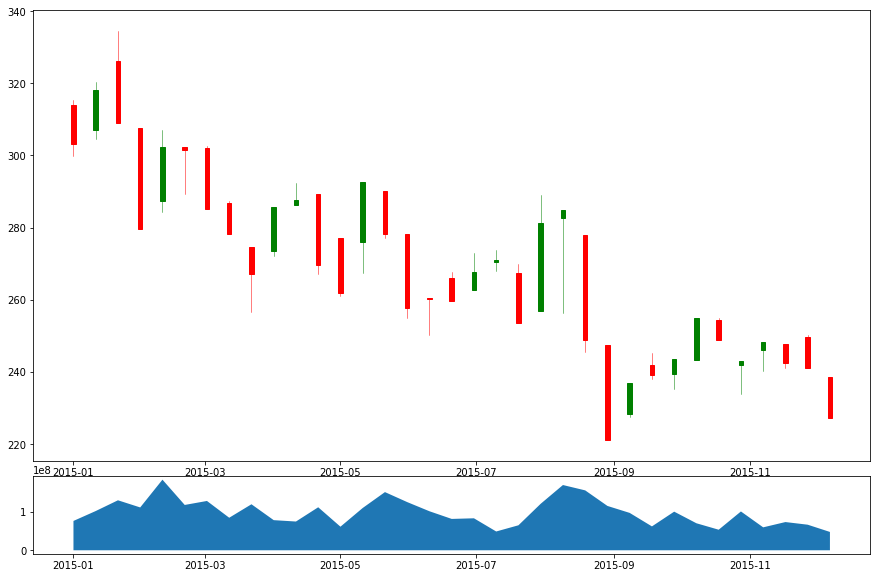

In [143]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date() # Converts matplotlib dates to actual dates

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)


# NIFTY50

Now that we're done with understanding how this works let's work with a list of companies, say the NIFTY 50. 

This NIFT 50 List is found [here](https://en.wikipedia.org/wiki/NIFTY_50). We will be using this link to scrap the data required. 

<em>So what is web scraping? </em>
Think of it as extracting data from websites. 


In [154]:
import bs4 as bs
import pickle
import requests

resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
soup = bs.BeautifulSoup(resp.text)
# in some cases you'll have to pass 'lxml' as an argument too. 
# This is not required if you don't get an error

Now that we have the text, we need to get the table with companies and their sybol names from the text. This can be done with the following command: 

In [152]:
table = soup.find('table', {'class': 'wikitable sortable'})


The reason that `{'class': 'wikitable sortable'}` is added is cause each page might have more than one table and we need to search for the right table. 

Let's take a look at the source code for the website for a second. 
![png](websiteSource.png)

From this we can find that the required table has a class, wikitable sortable. Hence the extra parameter. 

In [153]:
tickers = []
for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[1].text # 1 as the Symbols required are in the second column. 
        tickers.append(ticker)
        
with open("nifty500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
tickers

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BHARTIARTL.NS',
 'INFRATEL.NS',
 'BPCL.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFC.NS',
 'HDFCBANK.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HINDPETRO.NS',
 'ICICIBANK.NS',
 'IBULHSGFIN.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'IOC.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'UPL.NS',
 'VEDL.NS',
 'WIPRO.NS',
 'YESBANK.NS',
 'ZEEL.NS']